# Question 2: TWO (2) layer neural network for classification

### Importing of Libraries & Loading of the data set into a dataframe

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

wine_df = sklearn_to_df(load_wine())
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Performing exploratory data analysis 

#### Step 1: Shape Analysis

In [79]:
wine_df.shape

(178, 14)

This means that we have 178 rows and 14 attributes or columns. Out of these 14, one of them is our target column, therefore, we have 13 parameters

#### Step 2: Attribute Analysis

In [80]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

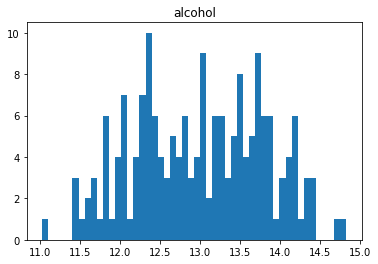

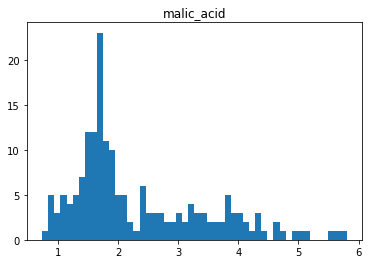

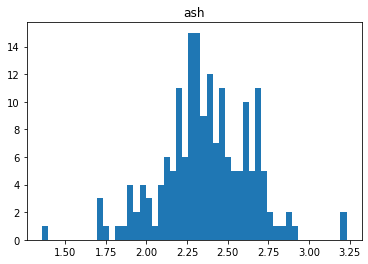

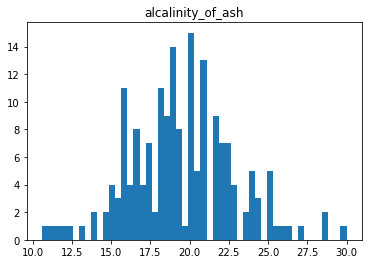

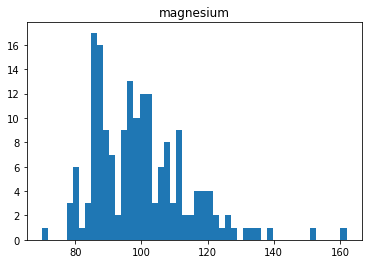

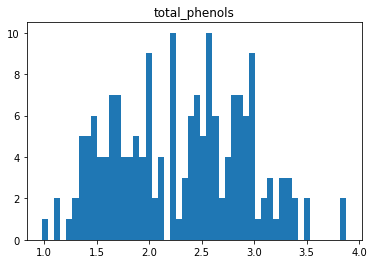

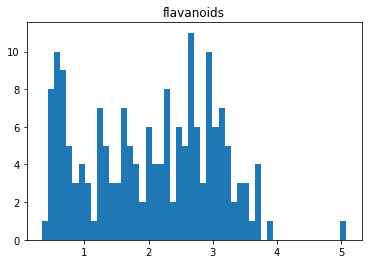

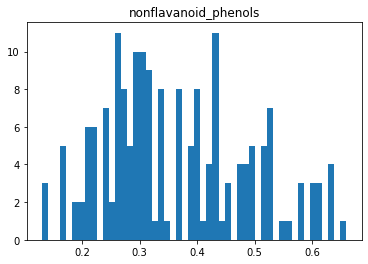

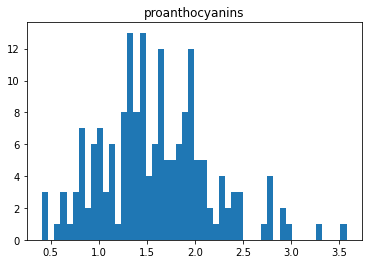

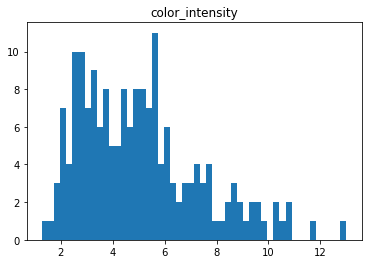

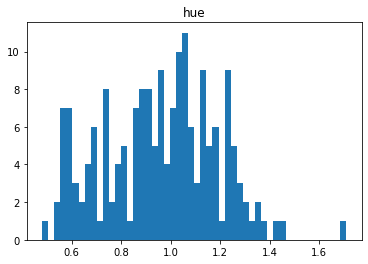

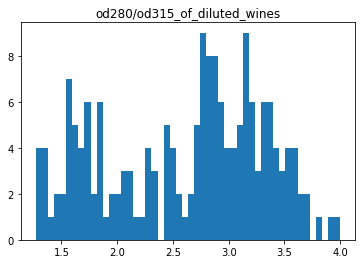

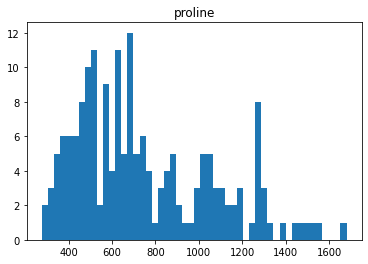

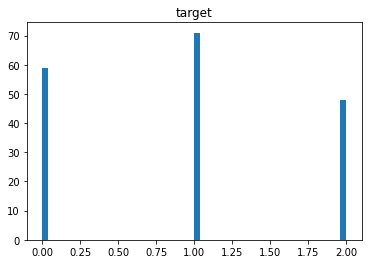

In [81]:
for name in wine_df.columns:
    plt.title(name)
    plt.hist(wine_df[name], bins=50)
    plt.show()

#### Step 3: Missing Value Analysis

In [82]:
pd.isnull(wine_df).sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Hence, we can note that there are no missing values in the dataset

#### Step 4: Attribute's Statistical Analysis

In [83]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


#### Step 5: Target's Distribution Analysis

Text(0.5, 1.0, 'Distribution of Different Wine Classes')

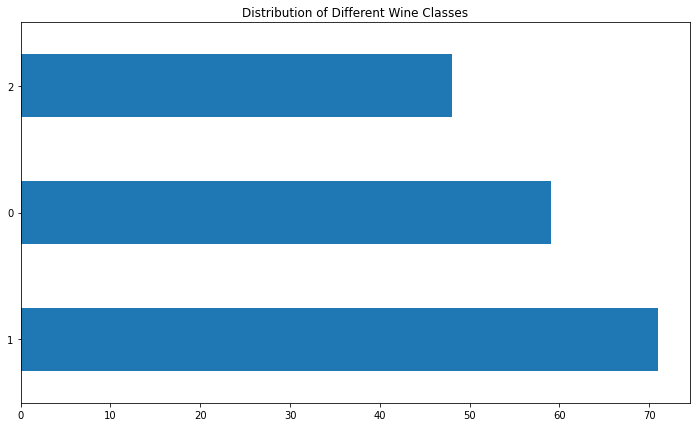

In [84]:
wine_df.target.value_counts().plot.barh(figsize=(12,7))
plt.title("Distribution of Different Wine Classes")

#### Step 6: Correlation Analysis

<AxesSubplot:>

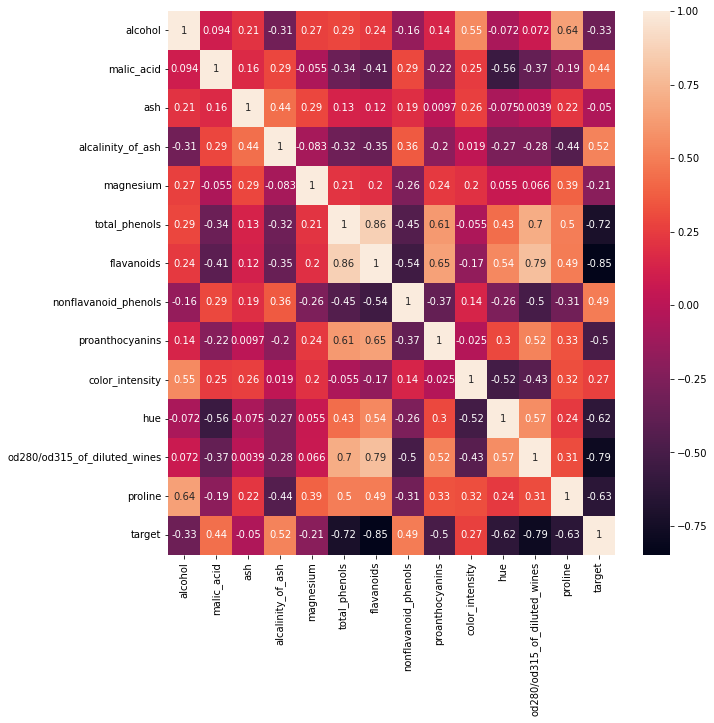

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(wine_df.corr(),color='k',annot=True)

#### Step 7: Train Test Split

In [86]:
X = wine_df.drop(['target'],axis=1).values
y = wine_df['target'].values
#Train and test splitting of data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Data Preprocessing:

Python's neural network may struggle to converge before the given number of iterations if the data is not standardized. Scaling your data is highly recommended because the multi-layer perceptron is sensitive to feature scaling. Remember that the test set must employ the same scaling in order for the results to be significant. There are several ways to normalize data; however, we'll standardize by using the StandardScaler that comes built-in.

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)   

### Training of the Neural Network Model

We are using 2 hidden layers of 13 neurons which are the same number as the attributes or parameters we have in the dataset.

In [88]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(13,13),activation='logistic', solver='lbfgs', random_state=1, max_iter=1000, verbose=True).fit(X_train, y_train)
print(model.score(X_train, y_train))

1.0


### Evaluation of the Neural Network Model

In [89]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0])

In [90]:
print(model.score(X_test, y_test))

1.0


In [91]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


We discover using this confusion matrix that every test set was appropriately categorised. Due to the absence of false positives and negatives. The drawback of a Multi-Layer Perceptron model, however, is how challenging it is to interpret the model itself. In regard to the features that are significant to the model itself, the weights and biases won't be simple to interpret.

### Comparison of the Neural Network Model to the Naive Bayes Algorithm

#### Naive Bayes Model and Evaluation

In [92]:
from sklearn import naive_bayes, metrics
model = naive_bayes.BernoulliNB()
model.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model.predict(X_test)
print(metrics.confusion_matrix(expected_y, predicted_y))

[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]


In [93]:
print(model.score(X_test, y_test))

0.9444444444444444


We can see that the Two Layer Neural Network's model score was flawless, with no misclassifications. While only 2 of the testing set were wrongly categorized by the Naive Bayes algorithm, which gave us a success rate of over 94%. This means that after performing exploratory data analysis and pre-processing on the dataset, we trained the neural network so that it performs better than the Naive Bayes algorithm.